# d1_pyore Tutorial

The d1_pyore library facilitates creation and consumption of OAI-ORE documents that are used by DataONE to dscribe data packages (i.e. the combination of Data and Metadata that make up a scientifically meaningful usint of information.

Load the RDF-XML data from a DataONE Coordinating Node. Note that this direct access is more fragile than using the combination of resolve() and get().

In [2]:
import requests
import urllib

#identifier for a resource map
pid = "ark:/13030/m5dz07z6/2/mrt-dataone-map.rdf"
url = "https://cn.dataone.org/cn/v2/object/" + urllib.quote(pid.encode('utf-8'))
ore_document = requests.get(url).text
print ore_document

<rdf:RDF
    xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
    xmlns:foaf="http://xmlns.com/foaf/0.1/"
    xmlns:dc="http://purl.org/dc/elements/1.1/"
    xmlns:ore="http://www.openarchives.org/ore/terms/"
    xmlns:dcterms="http://purl.org/dc/terms/"
    xmlns:cito="http://purl.org/spar/cito/"
    xmlns:rdfs1="http://www.w3.org/2001/01/rdf-schema#" > 
  <rdf:Description rdf:about="http://www.openarchives.org/ore/terms/Aggregation">
    <rdfs1:label>Aggregation</rdfs1:label>
    <rdfs1:isDefinedBy rdf:resource="http://www.openarchives.org/ore/terms/"/>
  </rdf:Description>
  <rdf:Description rdf:about="https://cn.dataone.org/cn/v1/resolve/ark%3A%2F13030%2Fm5dz07z6%2F2%2Fcadwsap-s3400113-001-vuln.csv">
    <dcterms:identifier>ark:/13030/m5dz07z6/2/cadwsap-s3400113-001-vuln.csv</dcterms:identifier>
    <cito:isDocumentedBy rdf:resource="https://cn.dataone.org/cn/v1/resolve/ark%3A%2F13030%2Fm5dz07z6%2F2%2Fcadwsap-s3400113-001.xml"/>
  </rdf:Description>
  <rdf:Description rdf:ab

## Convert to JSON-LD

Print out the OAI-ORE document in JSON-LD format, which is more easily processed using Javascript.

In [3]:
from d1_pyore import resource_map
ore_object = resource_map.ResourceMap()
ore_object.parse(data=ore_document)
json_document = ore_object.serialize(format="json-ld") 
print json_document

[
  {
    "@id": "https://cn.dataone.org/cn/v1/resolve/ark%3A%2F13030%2Fm5dz07z6%2F2%2Fmrt-dataone-map.rdf",
    "@type": [
      "http://www.openarchives.org/ore/terms/ResourceMap"
    ],
    "http://purl.org/dc/elements/1.1/format": [
      {
        "@value": "application/rdf+xml"
      }
    ],
    "http://purl.org/dc/terms/created": [
      {
        "@value": "2013-09-12T07:33:27-07:00"
      }
    ],
    "http://purl.org/dc/terms/creator": [
      {
        "@value": "Merritt"
      }
    ],
    "http://purl.org/dc/terms/identifier": [
      {
        "@value": "ark:/13030/m5dz07z6/2/mrt-dataone-map.rdf"
      }
    ],
    "http://purl.org/dc/terms/modified": [
      {
        "@value": "2013-09-12T07:33:27-07:00"
      }
    ],
    "http://www.openarchives.org/ore/terms/describes": [
      {
        "@id": "http://store.cdlib.org:35121/content/1001/ark%3A%2F13030%2Fm5dz07z6/2/"
      }
    ]
  },
  {
    "@id": "https://cn.dataone.org/cn/v1/resolve/ark%3A%2F13030%2Fm5dz07z6%2F2

## Retrieve Data IDs

Retrieve the entries that are the target of a CITO:documents statement. CITO:documents is used to indicate that the subject, i.e. a metadata document, docments the object, i.e. a data object.

In [4]:
import d1_pyore
import pprint
# A list of dc.identifer entries for each entry that is object of CITO:documents 
documents = ore_object.getAggregatedScienceDataPids()
pprint.pprint(documents)

['ark:/13030/m5dz07z6/2/cadwsap-s3400113-001-main.csv',
 'ark:/13030/m5dz07z6/2/cadwsap-s3400113-001-vuln.csv',
 'ark:/13030/m5dz07z6/2/cadwsap-s3400113-001.pdf']


## Rendered Graph

Render the OAI-ORE document using Graphviz

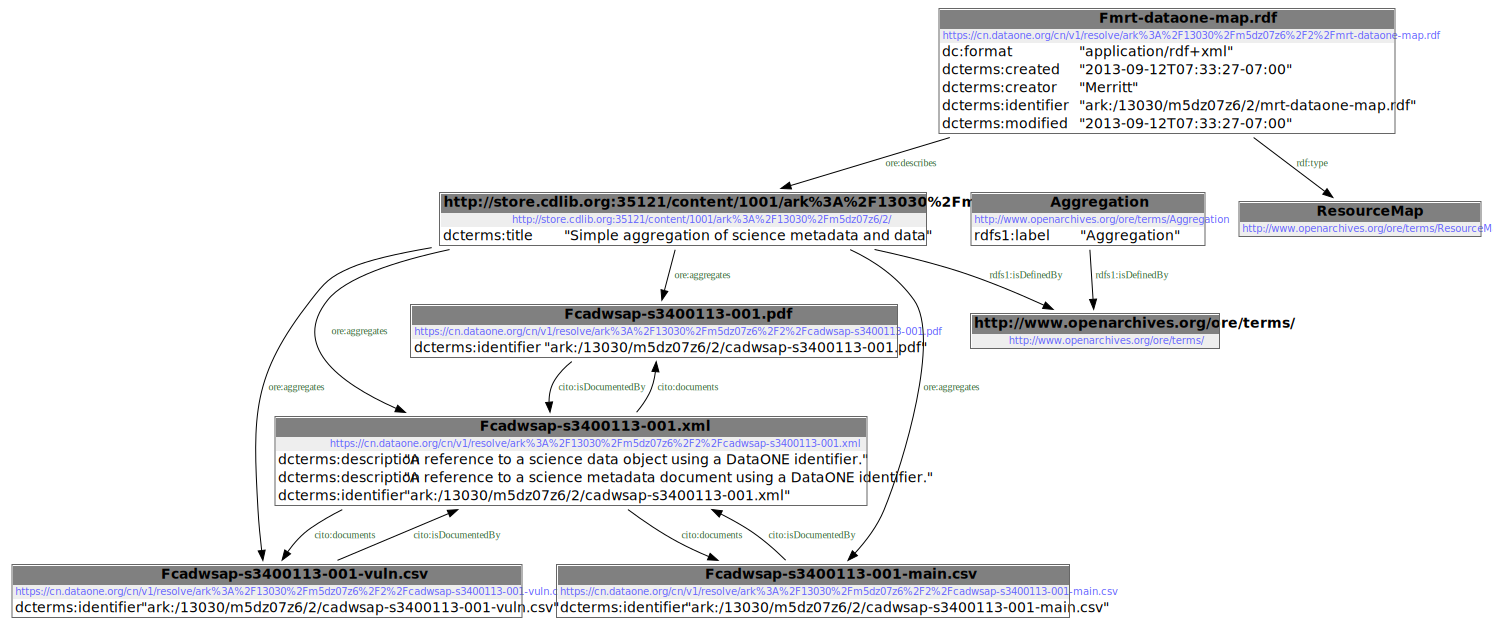

In [5]:
from graphviz import Source
from StringIO import StringIO
ore_dot = StringIO()
ore_object.asGraphvizDot(ore_dot)
ore_graph = Source(ore_dot.getvalue())
ore_graph